In [77]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

%matplotlib inline

trd = pd.read_csv("train_data.csv")
tsd = pd.read_csv("test_data.csv")

In [78]:
import math

In [79]:
import warnings
warnings.filterwarnings("ignore")

In [80]:
trd.head(5)

,Elan_ID,Views,Day,Month,Category,Floor,Area,Number of rooms,Price currency,Location,Address,Title,Text,Land area,Extracts,Mortgage,Type of building,Price
0,19286,106,04,İyun,Yeni tikili,16 / 17,110 m²,3.0,AZN,"İnşaatçılar m.,Yasamal r.,Yasamal q.","Ünvan: Bakı şəhəri, Həsən Bəy Zərdabi küç","İcarəyə verilir 3 otaqlı yeni tikili 110 m², İ...",Yasamal rayonu.Zerdabi pr. Baku Mall-in yaxinl...,NaN,NaN,NaN,NaN,750.0
1,2989,185,18,İyun,Köhnə tikili,5 / 9,80 m²,3.0,AZN,"Sabunçu r.,Bakıxanov q.","Ünvan: Bakı şəhəri, Xudu Məmmədov küç. 4759","İcarəyə verilir 3 otaqlı köhnə tikili 80 m², B...",Hər bir şəraiti var.Yalniz ailəli şəxslərə ver...,NaN,NaN,NaN,NaN,450.0
2,20316,162,03,İyun,Ofis,NaN,64 m²,3.0,AZN,"Dövlət Statistika Komitəsi ,M.Hüseynzadə parkı...","Ünvan: Bakı şəhəri, Naxçıvani küç.","İcarəyə verilir 3 otaqlı ofis 64 m², Nizami m.",Ofis idial vəziyyətdədir çox gözəl təmirlidir ...,NaN,NaN,NaN,Biznes mərkəzi,1300.0
3,4591,92,17,İyun,Ev / Villa,NaN,100 m²,3.0,AZN,Qəbələ,"Ünvan: Qəbələ şəhəri, Vəndam qəsəbəsi","İcarəyə verilir 3 otaqlı ev / villa 100 m², Qə...",Ucuz və super şəraitli həyət evləri bizdə. Yay...,6 sot,NaN,NaN,NaN,60.0
4,19751,189,04,İyun,Yeni tikili,12 / 13,42 m²,2.0,AZN,Xırdalan,"Ünvan: Xırdalan şəhəri, Heydar Eliyev P.R","Satılır 2 otaqlı yeni tikili 42 m², Xırdalan",NaN,NaN,var,var,NaN,43000.0


In [81]:
trd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19950 entries, 0 to 19949
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Elan_ID           19950 non-null  int64  
 1   Views             19950 non-null  int64  
 2   Day               19950 non-null  object 
 3   Month             19950 non-null  object 
 4   Category          19950 non-null  object 
 5   Floor             13927 non-null  object 
 6   Area              19950 non-null  object 
 7   Number of rooms   16255 non-null  float64
 8   Price currency    19950 non-null  object 
 9   Location          19950 non-null  object 
 10  Address           19950 non-null  object 
 11  Title             19950 non-null  object 
 12  Text              14688 non-null  object 
 13  Land area         3476 non-null   object 
 14  Extracts          14834 non-null  object 
 15  Mortgage          818 non-null    object 
 16  Type of building  340 non-null    object

In [82]:
trd.describe()

,Elan_ID,Views,Number of rooms,Price
count,19950.000000,19950.000000,16255.000000,1.995000e+04
mean,13301.717744,397.512030,2.996801,1.757063e+05
std,7680.359730,931.341229,1.488644,4.353730e+05
min,1.000000,45.000000,1.000000,1.000000e+01
25%,6667.500000,145.000000,2.000000,6.000000e+03
50%,13305.500000,209.000000,3.000000,9.800000e+04
75%,19953.750000,342.750000,3.000000,1.850000e+05
max,26600.000000,32946.000000,20.000000,1.700000e+07


In [83]:
features_for_drop =["Price currency","Day","Month","Type of building",
                    "Floor","Land area","Location","Address",
                    "Text","Mortgage","Extracts"]
trd.drop(features_for_drop,axis=1,inplace =True)
tsd.drop(features_for_drop,axis=1,inplace =True)

In [84]:
erazilist = []
for t in trd["Title"]:
    newlist = t.split(",")
    erazilist.append(newlist[-1:])

In [85]:
erazilists = []
for t in tsd["Title"]:
    newlists = t.split(",")
    erazilists.append(newlists[-1:])

In [86]:
trd["Erazi"]=pd.DataFrame(erazilist)

In [87]:
tsd["Erazi"]=pd.DataFrame(erazilists)

In [88]:
eralist = trd["Erazi"].value_counts()

In [89]:
for e in trd["Erazi"].unique():
    print(e)

 İnşaatçılar m.
 Bakıxanov q.
 Nizami m.
 Qəbələ
 Xırdalan
 Balaxanı q.
 Yeni Günəşli q.
 Şah İsmayıl Xətai m.
 Yeni Yasamal q.
 Elmlər Akademiyası m.
 Xalqlar Dostluğu m.
 Nəsimi r.
 Buzovna q.
 Novxanı q.
 9-cu mikrorayon q.
 Qara Qarayev m.
 Nəriman Nərimanov m.
 Neftçilər m.
 Mərdəkan q.
 Nardaran q.
 Mehdiabad q.
 Pirallahı r.
 Şəki
 Ulduz m.
 Nərimanov r.
 Binəqədi q.
 Yasamal r.
 20 Yanvar m.
 Əhmədli q.
 Xətai r.
 Binə q.
 Azadlıq Prospekti m.
 Nəsimi m.
 Şüvəlan q.
 Qaraçuxur q.
 Abşeron r.
 İçəri Şəhər m.
 Biləcəri q.
 Gənclik m.
 8-ci mikrorayon q.
 Massiv D q.
 Badamdar q.
 Yasamal q.
 Əhmədli m.
 Həzi Aslanov q.
 Kürdəxanı q.
 Memar Əcəmi m.
 Zabrat q.
 28 May m.
 Quba
 Həzi Aslanov m.
 Bülbülə q.
 Bilgəh q.
 3-cü mikrorayon q.
 Səbail r.
 Ceyranbatan q.
 Sahil m.
 Binəqədi r.
 Hövsan q.
 Xəzər r.
 7-ci mikrorayon q.
 Sumqayıt
 4-cü mikrorayon q.
 Pirşağı q.
 Hökməli q.
 Şamaxı
 Siyəzən
 Məmmədli q.
 Lənkəran
 Zığ q.
 Yeni Ramana q.
 Xaçmaz
 Ramana q.
 Bayıl q.
 Masazır q.

In [90]:
merkez = ["Nizami m.","Şah İsmayıl Xətai m.","Elmlər Akademiyası m.","Nəsimi r.","Nəriman Nərimanov m.","Nərimanov r.",
         "İçəri Şəhər m.","Gənclik m.","Badamdar q.","28 May m.","Sahil m."]
orta = ["İnşaatçılar m.","Bakıxanov q.","Yeni Yasamal q.","Xalqlar Dostluğu m.","Qara Qarayev m."
       ,"Neftçilər m.","Ulduz m.","Yasamal r.","20 Yanvar m.","Azadlıq Prospekti m.","Nəsimi m.","8-ci mikrorayon q.",
        "Yasamal q.","Əhmədli m.","Memar Əcəmi m.","Həzi Aslanov m.","3-cü mikrorayon q.","Səbail r.","Binəqədi r.",
        "7-ci mikrorayon q.","4-cü mikrorayon q.","Dərnəgül m.","Nizami r.","8-ci kilometr q.","Bakmil m.","Kubinka q."
       ,"Koroğlu m."]
uzaq = ["Xırdalan","Yeni Günəşli q.","9-cu mikrorayon q.","Pirallahı r.","Binəqədi q.","Xətai r.","Qaraçuxur q.",
        "Biləcəri q.","Massiv D q.","Həzi Aslanov q.","Xəzər r.","Bayıl q.","Masazır q.","M.Ə.Rəsulzadə q.",
        "Köhnə Günəşli q.","Şimal DRES q.","Sabunçu q.","Qaradağ r.","Yeni Suraxanı q.","6-cı mikrorayon q.","Avtovağzal m.",
       "Keşlə q.","Suraxanı r.","Xutor q.","5-ci mikrorayon q.","1-ci mikrorayon q.","Suraxanı q.","2-ci Alatava q."]
bakietrafi = ["Balaxanı q.","Buzovna q.","Novxanı q.","Mərdəkan q.","Nardaran q.","Mehdiabad q.","Əhmədli q.",
              "Binə q.","Şüvəlan q.","Abşeron r.","Kürdəxanı q.","Zabrat q.","Ceyranbatan q.","Hövsan q.","Sumqayıt",
             "Pirşağı q.","Hökməli q.","Bilgəh q.","Bülbülə q.","Məmmədli q.","Zığ q.","Yeni Ramana q.","Ramana q.",
             "Zağulba q.","Maştağa q.","Saray q.","Sulutəpə q.","Lökbatan q.","Görədil q.","Fatmayı q.","Əmircan q.",
             "Şağan q.","Qobu q.","Sahil q.","Türkan q.","Çiçək q.","Səngəçal q.","Digah q.","NZS q.","Dübəndi q.",
              "Günəşli q.","Savalan q.","20-ci sahə q.","28 May q.","Xocəsən q.","Qala q.","Böyükşor q.","Müşviqabad q.",
              "Xudat","Puta q.","Ələt q.","Zirə q.","Massiv V q.","Yeni Balaxanı q.","Şıxov q.","Qobustan q.","Pirəkəşkül q.",
             "Gürgən q.","Bahar q.","Dədə Qorqud q.","2-ci mikrorayon q.","Şərq q.","Yeni Corat q."]
rayon = ["Qəbələ","Şəki","Quba","Şamaxı","Siyəzən","Lənkəran","Xaçmaz","Qax","Gəncə","Şəmkir","İsmayıllı","Göyçay",
         "Neftçala","Oğuz","Mingəçevir","Göygöl","Balakən","Qusar","Xızı","Sabirabad","Şabran","Cəlilabad","Zaqatala",
         "Şirvan","Tovuz","Gədəbəy","Daşkəsən","Masallı","Salyan","Astara","Goranboy","Naftalan","İmişli","Hacıqabul",
        "Qazax","Kürdəmir","Ağsu","Ucar","Naxçıvan"]

In [104]:
loclist = []
loclistdx = []
text = list(trd["Erazi"])
def textchecker(listoftags1,listoftags2,listoftags3,listoftags4,listoftags5,listoftext,listofboolens,
                tag1,tag2,tag3,tag4,tag5):
    for t in listoftext:
        if any(tag1 in str(t) for tag1 in listoftags1):
            listofboolens.append(tag1)
        elif any(tag2 in str(t) for tag2 in listoftags2):
            listofboolens.append(tag2)    
        elif any(tag3 in str(t) for tag3 in listoftags3):
            listofboolens.append(tag3)
        elif any(tag4 in str(t) for tag4 in listoftags4):
            listofboolens.append(tag4)
        elif any(tag5 in str(t) for tag5 in listoftags5):
            listofboolens.append(tag5)
            
            
textchecker(merkez,orta,uzaq,bakietrafi,rayon,text,loclist,"merkez","orta","uzaq","bakietrafi","rayon")

In [105]:
loclists = []
loclistdxs = []
text = list(tsd["Erazi"])
def textchecker(listoftags1,listoftags2,listoftags3,listoftags4,listoftags5,listoftext,listofboolens,
                tag1,tag2,tag3,tag4,tag5):
    for t in listoftext:
        if any(tag1 in str(t) for tag1 in listoftags1):
            listofboolens.append(tag1)
        elif any(tag2 in str(t) for tag2 in listoftags2):
            listofboolens.append(tag2)    
        elif any(tag3 in str(t) for tag3 in listoftags3):
            listofboolens.append(tag3)
        elif any(tag4 in str(t) for tag4 in listoftags4):
            listofboolens.append(tag4)
        elif any(tag5 in str(t) for tag5 in listoftags5):
            listofboolens.append(tag5)
            
            
textchecker(merkez,orta,uzaq,bakietrafi,rayon,text,loclists,"merkez","orta","uzaq","bakietrafi","rayon")

In [106]:
trd["Erazi"] = pd.DataFrame(loclist)

In [107]:
tsd["Erazi"] = pd.DataFrame(loclists)

In [108]:
trd["Erazi"].fillna("orta",inplace=True)

In [109]:
tsd["Erazi"].fillna("orta",inplace=True)

<AxesSubplot:>

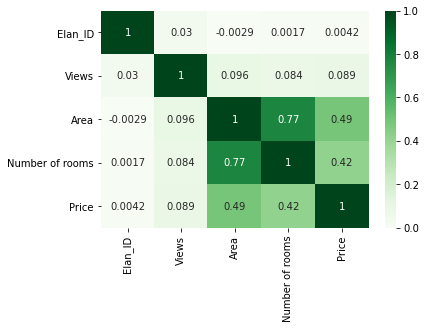

In [120]:
sns.heatmap(trd.corr(),cmap="Greens",annot=True)

In [103]:
trd.head()

,Elan_ID,Views,Category,Area,Number of rooms,Title,Price,Erazi
0,19286,106,Yeni tikili,110 m²,3.0,i,750.0,İnşaatçılar m.
1,2989,185,Köhnə tikili,80 m²,3.0,i,450.0,Bakıxanov q.
2,20316,162,Ofis,64 m²,3.0,i,1300.0,Nizami m.
3,4591,92,Ev / Villa,100 m²,3.0,i,60.0,Qəbələ
4,19751,189,Yeni tikili,42 m²,2.0,s,43000.0,Xırdalan


In [100]:
icarelist=[]
for t in trd["Title"]:
    if t.startswith("İcarə"):
        icarelist.append("i")
    elif t.startswith("Sat"):
        icarelist.append("s")
    else:
        icarelist.append("d")

In [101]:
icarelists=[]
for t in tsd["Title"]:
    if t.startswith("İcarə"):
        icarelists.append("i")
    elif t.startswith("Sat"):
        icarelists.append("s")
    else:
        icarelists.append("d")

In [102]:
trd["Title"]=icarelist
tsd["Title"]=icarelists

In [113]:
trd.head()

,Elan_ID,Views,Category,Area,Number of rooms,Title,Price,Erazi
0,19286,106,Yeni tikili,110.0,3.0,i,750.0,orta
1,2989,185,Köhnə tikili,80.0,3.0,i,450.0,orta
2,20316,162,Ofis,64.0,3.0,i,1300.0,merkez
3,4591,92,Ev / Villa,100.0,3.0,i,60.0,rayon
4,19751,189,Yeni tikili,42.0,2.0,s,43000.0,uzaq


In [111]:
arealist = []
sotindexlist = []
for a in trd["Area"]:
    if " m²" in a:
        a = a.replace(" m²","")
        arealist.append(a)
    elif " sot" in a:
        sotindexlist.append(list(trd["Area"]).index(a))
        a = a.replace(" sot","")
        arealist.append(a)

In [112]:
trd["Area"] = pd.DataFrame(arealist)
trd["Area"] = trd["Area"].astype(float)
#trd.drop(sotindexlist,inplace=True)
#trd["Area"].loc[sotindexlist] = trd["Area"].loc[sotindexlist]*100

In [115]:
trd["Area"].loc[sotindexlist] = trd["Area"].loc[sotindexlist]*10000

In [117]:
trd[trd["Area"]>2500]["Price"].count()

218

In [119]:
trd.drop(trd[trd["Area"]>2500].index,inplace=True)

In [122]:
arealists = []
sotindexlists = []
for a in tsd["Area"]:
    if " m²" in a:
        a = a.replace(" m²","")
        arealists.append(a)
    elif " sot" in a:
        sotindexlists.append(list(tsd["Area"]).index(a))
        a = a.replace(" sot","")
        arealists.append(a)

In [123]:
tsd["Area"] = pd.DataFrame(arealists)
tsd["Area"] = tsd["Area"].astype(float)
#tsd["Area"].loc[sotindexlists] = tsd["Area"].loc[sotindexlists]*10000

In [124]:
for cat in trd["Category"].unique():
    a = trd[trd["Category"]==cat]["Price"].mean()
    b = trd[trd["Category"]==cat]["Price"].count()
    c = trd[trd["Category"]==cat]["Area"].mean()
    d = a/c
    print(str(cat) +"           "+ str(a)+ "           " + str(b) + "           "+ str(c)+"         "+str(d))

Yeni tikili           149227.10270774976           9639           115.19635854341722         1295.415103347268
Köhnə tikili           77271.2073227612           4288           70.27026585820897         1099.6287886355617
Ofis           36844.43786982248           338           166.65384615384616         221.08363365229275
Ev / Villa           215875.12789526687           1986           241.29808660624366         894.6408607356153
Obyekt           480721.33167825226           1007           326.7658391261172         1471.1492883217668
Bağ           276236.9651707971           1493           283.24152712659077         975.2700035660268
Qaraj           19073.809523809523           21           26.904761904761905         708.9380530973451
Torpaq           230027.57708333334           960           29.064583333333335         7914.360045874847


In [125]:
trd["Category"].loc[trd[trd["Category"]=="Yeni tikili"].index] = "Menzil"
trd["Category"].loc[trd[trd["Category"]=="Köhnə tikili"].index] = "Menzil"
trd["Category"].loc[trd[trd["Category"]=="Ofis"].index] = "Obyekt"
trd["Category"].loc[trd[trd["Category"]=="Ev / Villa"].index] = "Bag"
trd["Category"].loc[trd[trd["Category"]=="Obyekt"].index] = "Obyekt"
trd["Category"].loc[trd[trd["Category"]=="Bağ"].index] = "Bag"
trd["Category"].loc[trd[trd["Category"]=="Torpaq"].index] = "Bag"
trd["Category"].loc[trd[trd["Category"]=="Qaraj"].index] = "Bag"

In [126]:
tsd["Category"].loc[tsd[tsd["Category"]=="Yeni tikili"].index] = "Menzil"
tsd["Category"].loc[tsd[tsd["Category"]=="Köhnə tikili"].index] = "Menzil"
tsd["Category"].loc[tsd[tsd["Category"]=="Ofis"].index] = "Obyekt"
tsd["Category"].loc[tsd[tsd["Category"]=="Ev / Villa"].index] = "Bag"
tsd["Category"].loc[tsd[tsd["Category"]=="Obyekt"].index] = "Obyekt"
tsd["Category"].loc[tsd[tsd["Category"]=="Bağ"].index] = "Bag"
tsd["Category"].loc[tsd[tsd["Category"]=="Torpaq"].index] = "Bag"
tsd["Category"].loc[tsd[tsd["Category"]=="Qaraj"].index] = "Bag"

In [127]:
trd[trd["Number of rooms"]>10].count()

Elan_ID            66
Views              66
Category           66
Area               66
Number of rooms    66
Title              66
Price              66
Erazi              66
dtype: int64

In [128]:
trd.drop(trd[trd["Number of rooms"]>10].index,inplace=True)
#tsd.drop(tsd[tsd["Number of rooms"]>10].index,inplace=True)

In [129]:
for cat in trd["Number of rooms"].unique():
    a = trd[trd["Number of rooms"]==cat]["Price"].mean()
    b = trd[trd["Number of rooms"]==cat]["Price"].count()
    c = trd[trd["Number of rooms"]==cat]["Area"].mean()
    d = a/c
    print(str(cat) +"           "+ str(a)+ "           " + str(b) + "           "+ str(c)+"         "+str(d))

3.0           125559.47917314268           6434           110.06492073360269         1140.7765374859305
2.0           68823.88905547226           5336           68.34370314842585         1007.0260446087267
nan           nan           0           nan         nan
4.0           225239.37797902763           2098           164.40614871306002         1370.0179691706091
1.0           44723.51063829787           940           46.16734042553191         968.7261649918313
5.0           254061.5430894309           615           225.19609756097563         1128.1791551500553
8.0           573782.1666666666           120           452.1358333333334         1269.0482026971981
7.0           403528.04761904763           210           399.4952380952381         1010.094762438315
10.0           691925.8301886793           53           612.3075471698113         1130.0298900232033
6.0           293320.60975609755           328           290.70243902439023         1009.006359700641
9.0           421318.627450

In [130]:
rn =  trd[trd["Number of rooms"].isnull()]["Area"]
rnl = pd.qcut(rn,10,labels = [1,2,3,4,5,6,7,8,9,10])
for i in rnl.index:
    trd["Number of rooms"].loc[i] = rnl[i]
trd["Number of rooms"] = trd["Number of rooms"].astype(float)

In [131]:
rnl

7         3
17        5
24        7
29        8
33       10
         ..
19908     4
19918    10
19930     8
19931     9
19937     6
Name: Area, Length: 3481, dtype: category
Categories (10, int64): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10]

In [132]:
rns =  tsd[tsd["Number of rooms"].isnull()]["Area"]
rnls = pd.qcut(rns,10,labels = [1,2,3,4,5,6,7,8,9,10])
for i in rnls.index:
    tsd["Number of rooms"].loc[i] = rnls[i]
tsd["Number of rooms"] = tsd["Number of rooms"].astype(float)

In [134]:
trd["Number of rooms"].loc[trd[trd["Number of rooms"]==1.0].index] = "1-2"
trd["Number of rooms"].loc[trd[trd["Number of rooms"]==2.0].index] = "1-2"
trd["Number of rooms"].loc[trd[trd["Number of rooms"]==3.0].index] = "3"
trd["Number of rooms"].loc[trd[trd["Number of rooms"]==4.0].index] = "4-6"
trd["Number of rooms"].loc[trd[trd["Number of rooms"]==5.0].index] = "4-6"
trd["Number of rooms"].loc[trd[trd["Number of rooms"]==6.0].index] = "4-6"
trd["Number of rooms"].loc[trd[trd["Number of rooms"]==7.0].index] = "7-10"
trd["Number of rooms"].loc[trd[trd["Number of rooms"]==8.0].index] = "7-10"
trd["Number of rooms"].loc[trd[trd["Number of rooms"]==9.0].index] = "7-10"
trd["Number of rooms"].loc[trd[trd["Number of rooms"]==10.0].index] = "7-10"

In [135]:
tsd["Number of rooms"].loc[tsd[tsd["Number of rooms"]==1.0].index] = "1-2"
tsd["Number of rooms"].loc[tsd[tsd["Number of rooms"]==2.0].index] = "1-2"
tsd["Number of rooms"].loc[tsd[tsd["Number of rooms"]==3.0].index] = "3"
tsd["Number of rooms"].loc[tsd[tsd["Number of rooms"]==4.0].index] = "4-6"
tsd["Number of rooms"].loc[tsd[tsd["Number of rooms"]==5.0].index] = "4-6"
tsd["Number of rooms"].loc[tsd[tsd["Number of rooms"]==6.0].index] = "4-6"
tsd["Number of rooms"].loc[tsd[tsd["Number of rooms"]==7.0].index] = "7-10"
tsd["Number of rooms"].loc[tsd[tsd["Number of rooms"]==8.0].index] = "7-10"
tsd["Number of rooms"].loc[tsd[tsd["Number of rooms"]==9.0].index] = "7-10"
tsd["Number of rooms"].loc[tsd[tsd["Number of rooms"]==11.0].index] = "7-10"
tsd["Number of rooms"].loc[tsd[tsd["Number of rooms"]==12.0].index] = "7-10"
tsd["Number of rooms"].loc[tsd[tsd["Number of rooms"]==13.0].index] = "7-10"
tsd["Number of rooms"].loc[tsd[tsd["Number of rooms"]==14.0].index] = "7-10"
tsd["Number of rooms"].loc[tsd[tsd["Number of rooms"]==15.0].index] = "7-10"
tsd["Number of rooms"].loc[tsd[tsd["Number of rooms"]==16.0].index] = "7-10"
tsd["Number of rooms"].loc[tsd[tsd["Number of rooms"]==17.0].index] = "7-10"
tsd["Number of rooms"].loc[tsd[tsd["Number of rooms"]==18.0].index] = "7-10"
tsd["Number of rooms"].loc[tsd[tsd["Number of rooms"]==19.0].index] = "7-10"
tsd["Number of rooms"].loc[tsd[tsd["Number of rooms"]==20.0].index] = "7-10"

In [136]:
trd["Number of rooms"] = trd["Number of rooms"].astype(str)
tsd["Number of rooms"] = tsd["Number of rooms"].astype(str)

In [137]:
trd.head()

,Elan_ID,Views,Category,Area,Number of rooms,Title,Price,Erazi
0,19286,106,Menzil,110.0,3,i,750.0,orta
1,2989,185,Menzil,80.0,3,i,450.0,orta
2,20316,162,Obyekt,64.0,3,i,1300.0,merkez
3,4591,92,Bag,100.0,3,i,60.0,rayon
4,19751,189,Menzil,42.0,1-2,s,43000.0,uzaq


In [138]:
from sklearn.preprocessing import StandardScaler as SS
mms = SS()
trd["Area"] = mms.fit_transform(trd["Area"].values.reshape(-1,1))
tsd["Area"] = mms.fit_transform(tsd["Area"].values.reshape(-1,1))
#trd["Views"] = mms.fit_transform(trd["Views"].values.reshape(-1,1))
#tsd["Views"] = mms.fit_transform(tsd["Views"].values.reshape(-1,1))

In [139]:
checkerlist = [1,100,1000,2500,5000,7500,10000,12500,15000,17500]
for check in checkerlist:
    print(str(check) + "   " + str(trd[trd["Views"]<check]["Price"].mean()))
    print(str(check) + "   " + str(trd[trd["Views"]>check]["Price"].mean()))

1   nan
1   166359.83667242958
100   169488.54903474904
100   166230.9294336119
1000   159742.85462578802
1000   277455.61392405065
2500   161914.08580294802
2500   426053.4712990937
5000   164541.20040920717
5000   472862.7586206897
7500   165477.2439683754
7500   450019.34426229505
10000   165674.49398818015
10000   520357.36842105264
12500   165863.5367070563
12500   572540.0
15000   165853.0168939548
15000   877790.0
17500   165869.3107517038
17500   2577540.0


In [140]:
print(trd[trd["Views"]<2500]["Price"].mean())
print(trd[(trd["Views"]>2500)&(trd["Views"]<13000)]["Price"].mean())
print(trd[(trd["Views"]>13000)]["Price"].mean())

161914.08580294802
411595.9322580645
639474.2857142857


In [141]:
bins = pd.IntervalIndex.from_tuples([(0, 2500), (2500, 13000), (13000, 1000000000)])
cv = pd.cut(trd["Views"],bins,labels=["az","orta","cox"]) 
cvs = pd.cut(tsd["Views"],bins,labels=["az","orta","cox"]) 

In [142]:
trd["Views"]=cv
tsd["Views"]=cvs

In [143]:
tsd["Category"].unique()

array(['Menzil', 'Bag', 'Obyekt'], dtype=object)

In [144]:
#from sklearn.preprocessing import LabelEncoder as LE
#le = LE()
#forencoding = ["Category","Number of rooms","Title","Erazi","Views"]
#for col in forencoding:
#    trd[col] = le.fit_transform(trd[col])
#for col in forencoding:
#    tsd[col] = le.fit_transform(tsd[col])

In [145]:
forencoding = ["Category","Number of rooms","Title","Erazi","Views"]
dummies = pd.get_dummies(trd[forencoding])
trd = pd.concat([trd,dummies],axis=1)
trd.drop(forencoding,axis=1,inplace=True)
dropdums = ["Category_Obyekt","Number of rooms_7-10","Title_i","Erazi_uzaq","Views_(0, 2500]"]
trd.drop(dropdums,axis=1,inplace=True)

In [146]:
forencoding = ["Category","Number of rooms","Title","Erazi","Views"]
dummiess = pd.get_dummies(tsd[forencoding])
tsd = pd.concat([tsd,dummiess],axis=1)
tsd.drop(forencoding,axis=1,inplace=True)
dropdums = ["Category_Obyekt","Number of rooms_7-10","Title_i","Erazi_uzaq","Views_(0, 2500]"]
tsd.drop(dropdums,axis=1,inplace=True)

<AxesSubplot:xlabel='Area', ylabel='Density'>

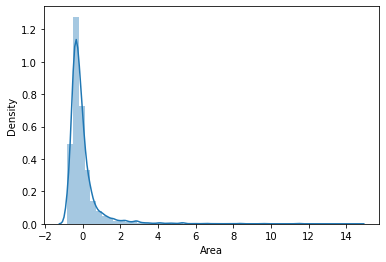

In [147]:
sns.distplot(trd["Area"])

In [148]:
from sklearn.model_selection import train_test_split as tts

#X = trd[["Area","Title_s"]]
ftdrop = ["Elan_ID","Price"]
X = trd.drop(ftdrop,axis=1)
y = trd["Price"]



#X = sondf.drop(["Elan_ID","Price"],axis=1)
#y = sondf["Price"]

X_train,X_test,y_train,y_test = tts(X,y,test_size=0.16,random_state=9)

from sklearn import tree, linear_model
tr = tree.DecisionTreeRegressor()
lr = linear_model.LinearRegression()
tr.fit(X_train,y_train)
lr.fit(X_train,y_train)
preds = tr.predict(X_test)
preds3 = lr.predict(X_test)
from sklearn.metrics import r2_score as r2, mean_squared_error as mse

print(r2(y_test,preds))
print(math.sqrt(mse(y_test,preds)))
print(r2(y_test,preds3))
print(math.sqrt(mse(y_test,preds3)))
#preds2 = tr.predict(tsd[mf])

from sklearn.ensemble import GradientBoostingRegressor as GB

gbr = GB(learning_rate=0.1,n_estimators=150,max_depth=3,loss="ls",criterion="mse",min_samples_split=6,
         min_samples_leaf=5,max_features="sqrt",random_state=13)

gbr.fit(X_train,y_train)
predgb = gbr.predict(X_test)
print(r2(y_test,predgb))
print(math.sqrt(mse(y_test,predgb)))

0.4456170385328706
205738.74885348746
0.4035180110779114
213407.57194982268
0.6055803730529752
173536.33310988185


In [1070]:
preds2 = lr.predict(tsd.drop("Elan_ID",axis=1))

sbd = pd.DataFrame({"Elan_ID":tsd["Elan_ID"],"Price":preds2})

sbd.to_csv("submitpolad13.csv",index=False,sep=",")

In [1069]:
predgbt = gbr.predict(tsd.drop(["Elan_ID"],axis=1))

sbd = pd.DataFrame({"Elan_ID":tsd["Elan_ID"],"Price":predgbt})

sbd.to_csv("submitpolad133.csv",index=False,sep=",")

In [149]:
show = {"Actual":y_test,"Predicted":preds}
showdata = pd.DataFrame(show)
showdata.sample(5)

,Actual,Predicted
10002,500.0,425.000000
16854,205000.0,195000.000000
18723,160000.0,155534.860465
16732,85000.0,178625.000000
17796,3500.0,2600.000000


In [1077]:
trd.groupby(["Number of rooms"]).mean()

,Elan_ID,Views,Category,Area,Title,Price,Erazi
Number of rooms,,,,,,,
0,13277.202604,0.008013,0.891258,-0.469932,0.700529,68812.521963,1.561168
1,13278.391604,0.012916,0.926904,-0.184384,0.752679,131033.021283,1.560106
2,13399.584102,0.030755,0.743080,0.238483,0.784244,224915.418973,1.562101
3,13221.067196,0.047648,0.548564,2.157909,0.765425,578653.868051,1.517410
